<a href="https://colab.research.google.com/github/ivanatrpeska5/DataScienceProject/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project assignment for the subject Introduction to Data Science**
#Made by: Ivana Trpeska, 201090
## Theme number 21: Sentiment Analysis:
 Analyze the sentiment of #LongCovid tweets to understand the emotional impact of long COVID on individuals. Identify patterns and trends in positive, negative, or neutral sentiments expressed in these tweets.


#**Data Preparation**

## Importing Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

I found 2 datasets with Covid tweets, one dataset is made with patient's tweets and the other one is made with nonpatient's tweets. They have same column names. So, I will make 1 dataset from them.

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/LongCovidDatasets/DATASETS/PATIENT.csv")

In [ ]:
df1.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,54.0,NaN,"['LongCovid', 'TikTok']",1,0,fear
1,2022-12-31 23:52:02+00:00,SChazaq,@JkkCalifornia @pacortez16 @fitterhappierAJ @D...,0.0,0.0,0.0,20.0,NaN,NaN,1,0,anger
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0,joy
3,2022-12-31 23:40:18+00:00,daniellakrn,@prof_goldberg I felt the same way and then re...,1.0,0.0,3.0,106.0,NaN,NaN,1,0,surprise
4,2022-12-31 23:39:36+00:00,PutinHarrass,@MarinaSilver6 I started exhibiting symptoms 3...,3.0,0.0,0.0,64.0,NaN,NaN,1,0,fear


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/LongCovidDatasets/DATASETS/NONPATIENT.csv")

<ipython-input-5-03b392d2802b>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/LongCovidDatasets/DATASETS/NONPATIENT.csv")


In [ ]:
df2.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,label
0,2022-12-31 23:59:17+00:00,RhonaBCoaching,Wishing you all a very happy and healthy 2023!...,0.0,0.0,0.0,67.0,NaN,"['yearend', 'celebrate', 'newyear2023', 'newye...",0,fear
1,2022-12-31 23:59:16+00:00,ChrisWexler,@HonorUkb @_HeartofGrace_ @resiapretorius @dbk...,0.0,0.0,1.0,18.0,NaN,NaN,0,fear
2,2022-12-31 23:57:31+00:00,ClagueNjc36,Happy New Year to all. Here's to answers to th...,6.0,0.0,0.0,226.0,NaN,"['ME', 'longcovid']",0,joy
3,2022-12-31 23:57:02+00:00,MyLyme_ca,"Finally, we rounded out 2022 w/ exciting news ...",2.0,0.0,1.0,914.0,NaN,"['ChronicLyme', 'LongCovid']",0,joy
4,2022-12-31 23:56:53+00:00,sansIumiere,oh lord it seems like i might actually be sick...,0.0,0.0,0.0,26.0,NaN,NaN,0,surprise


In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,54.0,NaN,"['LongCovid', 'TikTok']",1,0.0,fear
1,2022-12-31 23:52:02+00:00,SChazaq,@JkkCalifornia @pacortez16 @fitterhappierAJ @D...,0.0,0.0,0.0,20.0,NaN,NaN,1,0.0,anger
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0.0,joy
3,2022-12-31 23:40:18+00:00,daniellakrn,@prof_goldberg I felt the same way and then re...,1.0,0.0,3.0,106.0,NaN,NaN,1,0.0,surprise
4,2022-12-31 23:39:36+00:00,PutinHarrass,@MarinaSilver6 I started exhibiting symptoms 3...,3.0,0.0,0.0,64.0,NaN,NaN,1,0.0,fear


In [ ]:
missing_values=df.isnull().sum()
percentage_df=100*df.isnull().sum()/len(df)
missing_values_table=pd.concat([missing_values,percentage_df], axis=1)
missing_values_table.columns=['Num. of missing values','% of missing values']
missing_values_table

,Num. of missing values,% of missing values
Date,0,0.000000
User,0,0.000000
text,0,0.000000
LikeCount,3,0.000127
RetweetCount,6,0.000255
ReplyCount,6,0.000255
ViewCount,2204824,93.592061
Place,2319926,98.477999
Hashtags,1692499,71.844497
PCS_patient,0,0.000000


In [ ]:
df=df.drop('ViewCount', axis=1)

In [ ]:
df=df.drop('Place', axis=1)

In [ ]:
df=df.drop('MentalHealth', axis=1)

## Adaptation of the dataset according to the requirements

Our assignment is to make sentiment analysis on tweets with hashtag #LongCovid and identify patterns and trends in positive, negative, or neutral sentiments expressed in these tweets.

### Labels

I want to see how many unique labels are in the dataset and their names.

In [ ]:
unique_labels = df['label'].unique()
num_unique_labels = len(unique_labels)

print(f"Number of unique labels: {num_unique_labels}")
print("Unique labels:", unique_labels)

Number of unique labels: 7
Unique labels: ['fear' 'anger' 'joy' 'surprise' 'sadness' 'neutral' 'disgust']


Now I want to see how many times each label is repeated.

In [ ]:
label_counts = df['label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Label Counts:
fear: 1002986
sadness: 490532
neutral: 354038
anger: 184931
surprise: 178262
joy: 124220
disgust: 20812


We need 'positive', 'negative' and 'neutral' labels, but we have 'fear', 'anger', 'joy', 'surprise', 'sadness', 'neutral' and 'disgust'. For this purpose, we will rename the labels, according to what emotions they show, and we will delete 'surprise', because it can belong to several categories.

In [ ]:
df = df[df['label'] != 'surprise']

In [ ]:
emotion_to_sentiment = {
    'fear': 'negative',
    'anger': 'negative',
    'joy': 'positive',
    'sadness': 'negative',
    'neutral': 'neutral',
    'disgust': 'negative'
}
df['label'] = df['label'].replace(emotion_to_sentiment)

In [ ]:
unique_labels = df['label'].unique()
num_unique_labels = len(unique_labels)

print(f"Number of unique labels: {num_unique_labels}")
print("Unique labels:", unique_labels)

label_counts = df['label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Number of unique labels: 3
Unique labels: ['negative' 'positive' 'neutral']
Label Counts:
negative: 1699261
neutral: 354038
positive: 124220


### Tweets with #LongCovid

In [ ]:
num_nan_hashtags = df['Hashtags'].isna().sum()
print(f"Number of rows with NaN in 'Hashtags' column: {num_nan_hashtags}")

num_longcovid_hashtags = df['Hashtags'].str.contains('LongCovid', case=False).sum()
print(f"Number of rows with 'LongCovid' in 'Hashtags' column: {num_longcovid_hashtags}")

num_rows_with_nulls = df.isna().any(axis=1).sum()
print(f"Number of rows with null values in any column: {num_rows_with_nulls}")


Number of rows with NaN in 'Hashtags' column: 1528215
Number of rows with 'LongCovid' in 'Hashtags' column: 544149
Number of rows with null values in any column: 1528215


In [ ]:
df = df.dropna(subset=['Hashtags'])

In [ ]:
df = df.dropna(subset=['Hashtags']).loc[df['Hashtags'].str.contains('LongCovid', case=False)]

#Visualisation

In [ ]:
unique_labels = df['label'].unique()
num_unique_labels = len(unique_labels)

print(f"Number of unique labels: {num_unique_labels}")
print("Unique labels:", unique_labels)

label_counts = df['label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Number of unique labels: 3
Unique labels: ['negative' 'positive' 'neutral']
Label Counts:
negative: 504300
positive: 27285
neutral: 12564


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

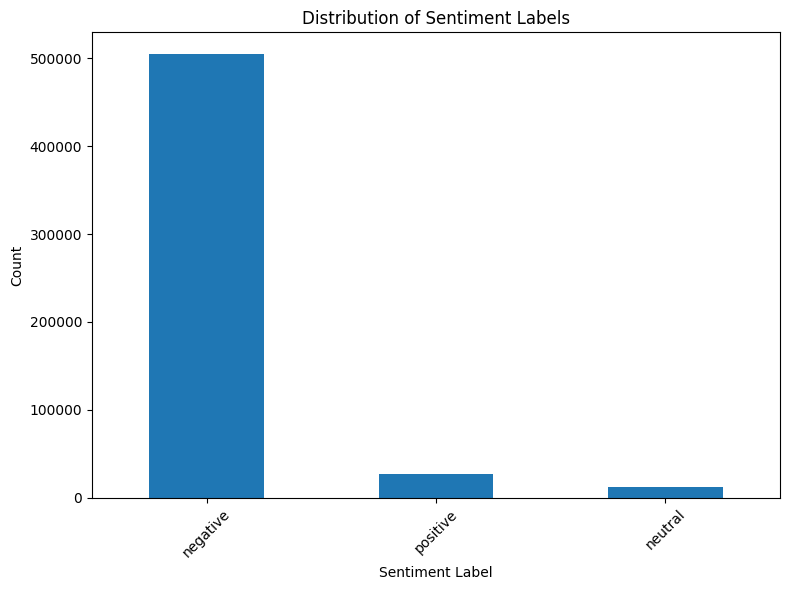

In [ ]:
class_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df['text_length'] = df['text'].apply(len)

In [ ]:
df.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,Hashtags,PCS_patient,label,text_length
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,"['LongCovid', 'TikTok']",1,negative,152
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,['LongCovid'],1,positive,310
5,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,2.0,0.0,0.0,['LongCovid'],1,positive,331
6,2022-12-31 23:14:32+00:00,ReneeSemarge1,No response from @Facebook. It has been 8 days...,1.0,0.0,6.0,['LongCovid'],1,negative,175
7,2022-12-31 23:10:32+00:00,rebbfyre,Please don't go out unmasked. I've been having...,1.0,1.0,1.0,"['Covid', 'MaskUp', 'CovidIsNotOver', 'LongCov...",1,negative,277


<Axes: >

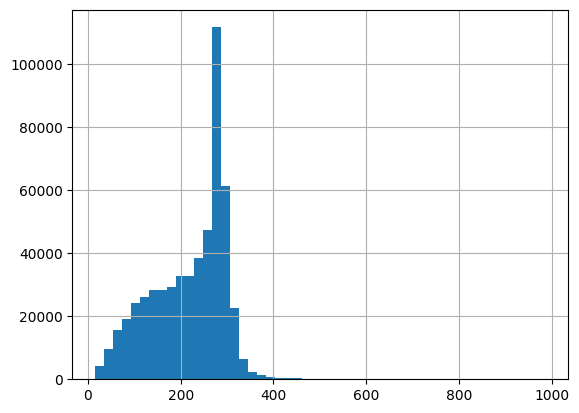

In [ ]:
df['text_length'].hist(bins=50)

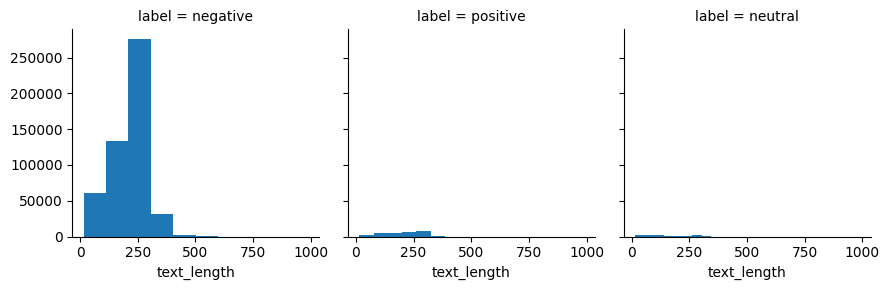

In [ ]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

I will decrease the number of tweets on 10.000 for each sentiment.

In [ ]:
# 10.000 count for each sentiment:
desired_count = 10000

# Creating an empty DataFrame to store the updated dataset
updated_df = pd.DataFrame(columns=df.columns)

sentiments_to_decrease = ['negative', 'positive', 'neutral']

for sentiment in sentiments_to_decrease:
    sentiment_indices = df[df['label'] == sentiment].index
    excess_indices = sentiment_indices[desired_count:]
    updated_df = updated_df.append(df.loc[sentiment_indices])
    df.drop(excess_indices, inplace=True)

df.to_csv('longCovid.csv', index=False)

<ipython-input-28-669946178188>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = updated_df.append(df.loc[sentiment_indices])
<ipython-input-28-669946178188>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = updated_df.append(df.loc[sentiment_indices])
<ipython-input-28-669946178188>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  updated_df = updated_df.append(df.loc[sentiment_indices])


In [ ]:
df.shape

(30000, 10)

In [ ]:
label_counts = df['label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Label Counts:
negative: 10000
positive: 10000
neutral: 10000


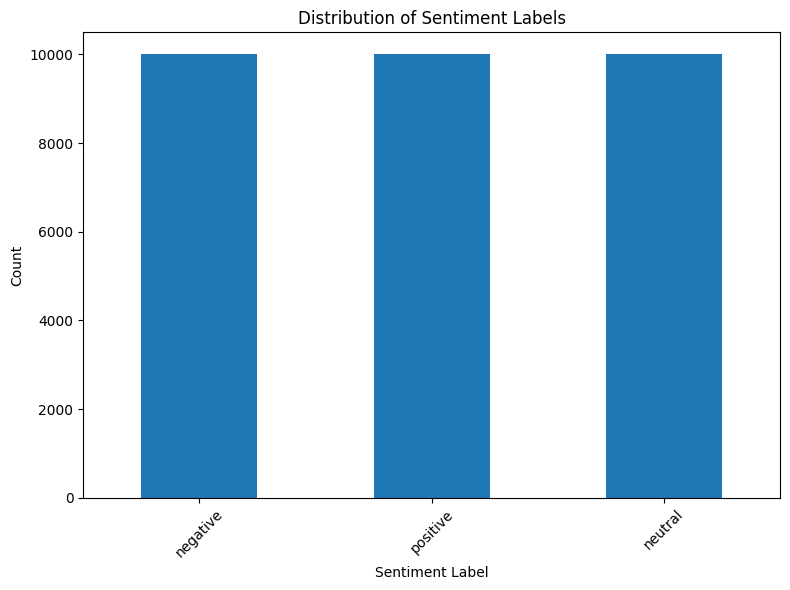

In [ ]:
class_counts = df['label'].value_counts()

plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Sentiment Labels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

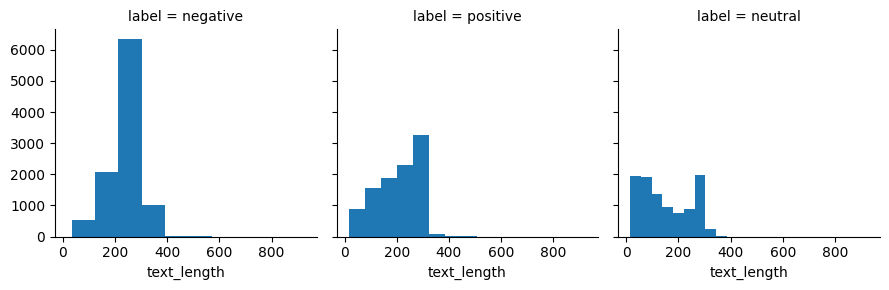

In [ ]:
g = sns.FacetGrid(df,col='label')
g.map(plt.hist,'text_length')

#**BERT**

## Installing Dependencies and loading pre-trained BERT NER model

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Preprocessing

In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])


In [ ]:
data['label']

0          0
2          2
5          2
6          0
7          0
          ..
1977348    1
1977553    1
1977708    1
1978202    1
1978342    1
Name: label, Length: 30000, dtype: int64

In [ ]:
sentences = data.text.values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.index.values,
                                                  data.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=data.label.values)

In [ ]:
data['data_type'] = ['not_set']*data.shape[0]

In [ ]:
data.loc[X_train, 'data_type'] = 'train'
data.loc[X_val, 'data_type'] = 'val'

In [ ]:
data.groupby(['label', 'data_type']).count()


Date  User  text  LikeCount  RetweetCount  ReplyCount  \
label data_type                                                          
0     train      8000  8000  8000       8000          8000        8000   
      val        2000  2000  2000       2000          2000        2000   
1     train      8000  8000  8000       8000          8000        8000   
      val        2000  2000  2000       2000          2000        2000   
2     train      8000  8000  8000       8000          8000        8000   
      val        2000  2000  2000       2000          2000        2000   

                 ViewCount  Place  Hashtags  PCS_patient  MentalHealth  \
label data_type                                                          
0     train           1734    200      8000         8000          8000   
      val              411     68      2000         2000          2000   
1     train            651    106      8000         8000           179   
      val              167     31      2000         2000            38   
2     train           1373    251      8000         8000          2581   
      val              349     54      2000         2000           665   

                 text_length  
label data_type               
0     train             8000  
      val               2000  
1     train             8000  
      val               2000  
2     train             8000  
      val               2000

## Loading Tokenizer And Encoding Our Data

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
 tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

In [ ]:
import torch
encoded_data_train = tokenizer.batch_encode_plus(
    data[data.data_type=='train'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    data[data.data_type=='val'].text.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(data[data.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data[data.data_type=='val'].label.values)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

dataset_val = TensorDataset(input_ids_val,
                            attention_masks_val,
                           labels_val)

In [ ]:
dataset_val.tensors

(tensor([[  101,  2053,  3433,  ...,     0,     0,     0],
         [  101,  2053, 12964,  ...,     0,     0,     0],
         [  101,  1030, 26629,  ...,     0,     0,     0],
         ...,
         [  101,  2146,  1011,  ...,     0,     0,     0],
         [  101,  1037,  2047,  ...,     0,     0,     0],
         [  101,  1030,  2852,  ...,     0,     0,     0]]),
 tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 tensor([0, 0, 0,  ..., 1, 1, 1]))

## Setting Up BERT Pretrained Model

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
model = BertForSequenceClassification.from_pretrained(
                                      'bert-base-uncased',
                                      num_labels = 3,
                                      output_attentions = False,
                                      output_hidden_states = False
                                     )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Creating Data Loaders

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=32
)

dataloader_val = DataLoader(
    dataset_val,
    sampler=RandomSampler(dataset_val),
    batch_size=32
)

## Setting Up Optimizer and Scheduler

In [ ]:
from transformers import AdamW
optimizer = AdamW(
    model.parameters(),
    lr = 1e-5,
    eps = 1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from transformers import get_linear_schedule_with_warmup

epochs = 1
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps = len(dataloader_train)*epochs
)

##  Defining our Performance Metrics

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

In [ ]:
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [ ]:
def accuracy_per_class(preds, labels):

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
def plot_confusion_matrix(preds, labels, class_encoder):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    cm = confusion_matrix(labels_flat, preds_flat)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_encoder.classes_, yticklabels=class_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

## Creating our Training Loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from tqdm.notebook import tqdm
import os
import torch

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total +=loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    print(f'Validation loss: {val_loss}')
    print(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/750 [00:00<?, ?it/s]

Training loss: 0.25125634703040123


  0%|          | 0/188 [00:00<?, ?it/s]

Validation loss: 0.282534753606516
F1 Score (weighted): 0.8902508204111417


In [ ]:
model.save_pretrained('/content/drive/MyDrive/LongCovidDatasets/MODELS/model')

In [ ]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

## Evaluation

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy:1791/2000

Class: 1
Accuracy:1828/2000

Class: 2
Accuracy:1721/2000



In [ ]:
def accuracy_per_class(preds, labels, class_encoder):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    class_names = class_encoder.classes_

    for label in np.unique(labels_flat):
        original_label = class_encoder.inverse_transform([label])[0]
        y_preds = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        print(f'Class: {original_label}')
        print(f'Accuracy: {len(y_preds[y_preds == label])}/{len(y_true)}\n')


In [ ]:
accuracy_per_class(predictions, true_vals, encoder)

Class: negative
Accuracy: 1791/2000

Class: neutral
Accuracy: 1828/2000

Class: positive
Accuracy: 1721/2000



In [ ]:
f1_score_func(predictions, true_vals)

0.8902508204111417

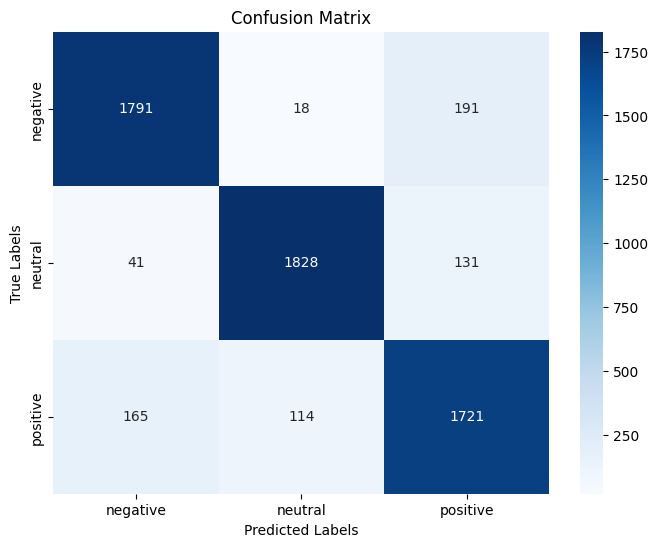

In [ ]:
plot_confusion_matrix(predictions, true_vals, encoder)

# **RoBERTa**

##Loading Dataset And Importing Libraries

In [ ]:
data2 = df.copy()

In [ ]:
data2.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,Hashtags,PCS_patient,label,text_length
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,"['LongCovid', 'TikTok']",1,negative,152
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,['LongCovid'],1,positive,310
5,2022-12-31 23:38:08+00:00,elusivechantues,This year I \n-survived 6 months &amp; countin...,2.0,0.0,0.0,['LongCovid'],1,positive,331
6,2022-12-31 23:14:32+00:00,ReneeSemarge1,No response from @Facebook. It has been 8 days...,1.0,0.0,6.0,['LongCovid'],1,negative,175
7,2022-12-31 23:10:32+00:00,rebbfyre,Please don't go out unmasked. I've been having...,1.0,1.0,1.0,"['Covid', 'MaskUp', 'CovidIsNotOver', 'LongCov...",1,negative,277


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from tqdm import tqdm

##Preprocessing

In [ ]:
encoder = LabelEncoder()
data2['label'] = encoder.fit_transform(data2['label'])

##Splitting Train And Test Data

In [ ]:
train_data, test_data = train_test_split(data2, test_size=0.2, random_state=42)


## Loading Tokenizer And Encoding Our Data




In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

train_texts = train_data['text'].tolist()
train_labels = train_data['label'].tolist()

test_texts = test_data['text'].tolist()
test_labels = test_data['label'].tolist()

train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=256)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=256)

train_labels = torch.tensor(train_labels)
test_labels = torch.tensor(test_labels)

## Setting Up RoBERTa Pretrained Model

In [ ]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(encoder.classes_))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##Creating Data Loaders

In [ ]:
# Create tensors for input_ids and attention_mask
train_input_ids = torch.tensor(train_encodings['input_ids'])
train_attention_mask = torch.tensor(train_encodings['attention_mask'])

test_input_ids = torch.tensor(test_encodings['input_ids'])
test_attention_mask = torch.tensor(test_encodings['attention_mask'])

# Create TensorDatasets for training and testing
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)

# Create DataLoader for training
train_sampler = RandomSampler(train_dataset)
train_loader = DataLoader(train_dataset, sampler=train_sampler, batch_size=8)

# Create DataLoader for testing
test_sampler = SequentialSampler(test_dataset)
test_loader = DataLoader(test_dataset, sampler=test_sampler, batch_size=8)


##Setting Up Optimizer and Scheduler

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=len(train_loader)*10)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


##Defining Our Performance Metrics

In [ ]:
def accuracy_per_class(preds, labels, class_encoder):
    preds_flat = preds.flatten()
    labels_flat = labels.flatten()

    class_names = class_encoder.classes_

    for label in np.unique(labels_flat):
        original_label = class_encoder.inverse_transform([label])[0]
        y_preds = preds_flat[labels_flat == label]
        y_true = labels_flat[labels_flat == label]
        print(f'Class: {original_label}')
        print(f'Accuracy: {len(y_preds[y_preds == label])}/{len(y_true)}\n')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(preds, labels, class_encoder):
    cm = confusion_matrix(labels, preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_encoder.classes_, yticklabels=class_encoder.classes_)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

##Creating Our Training Loop

In [ ]:
epochs=1

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

for epoch in range(1, epochs+1):
    model.train()
    train_loss = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch}'):
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()

    print(f'Training loss after epoch {epoch+1}: {train_loss/len(train_loader)}')


Epoch 1: 100%|██████████| 3000/3000 [18:49<00:00,  2.66it/s]

Training loss after epoch 2: 0.13351506277356143


##Evaluation

In [ ]:
model.eval()
test_preds = []
test_true = []

with torch.no_grad():
    for batch in tqdm(test_loader):
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        preds = torch.argmax(logits, dim=1).cpu().numpy()
        test_preds.extend(preds)
        test_true.extend(labels.cpu().numpy())

test_preds = np.array(test_preds)
test_true = np.array(test_true)

100%|██████████| 750/750 [01:34<00:00,  7.97it/s]


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_true, test_preds)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9173


In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(test_true, test_preds, average='weighted')
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.9178


In [ ]:
accuracy_per_class(test_preds, test_true, encoder)

Class: negative
Accuracy: 1856/1997

Class: neutral
Accuracy: 1771/1968

Class: positive
Accuracy: 1877/2035



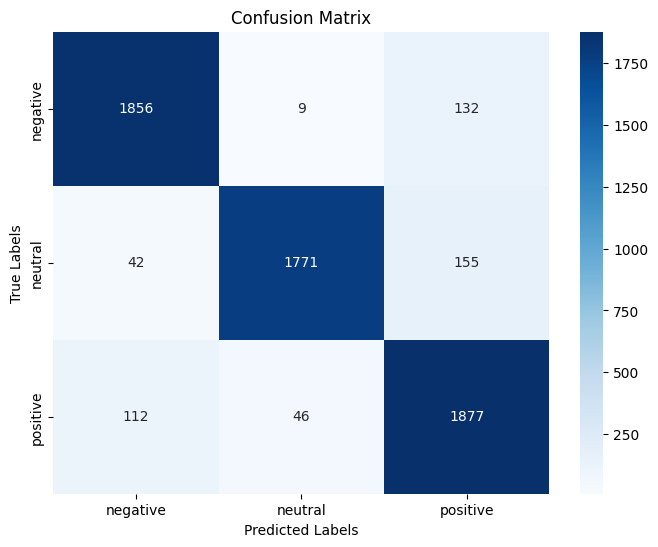

In [ ]:
plot_confusion_matrix(test_preds, test_true, encoder)


# **Comparison Of Models**

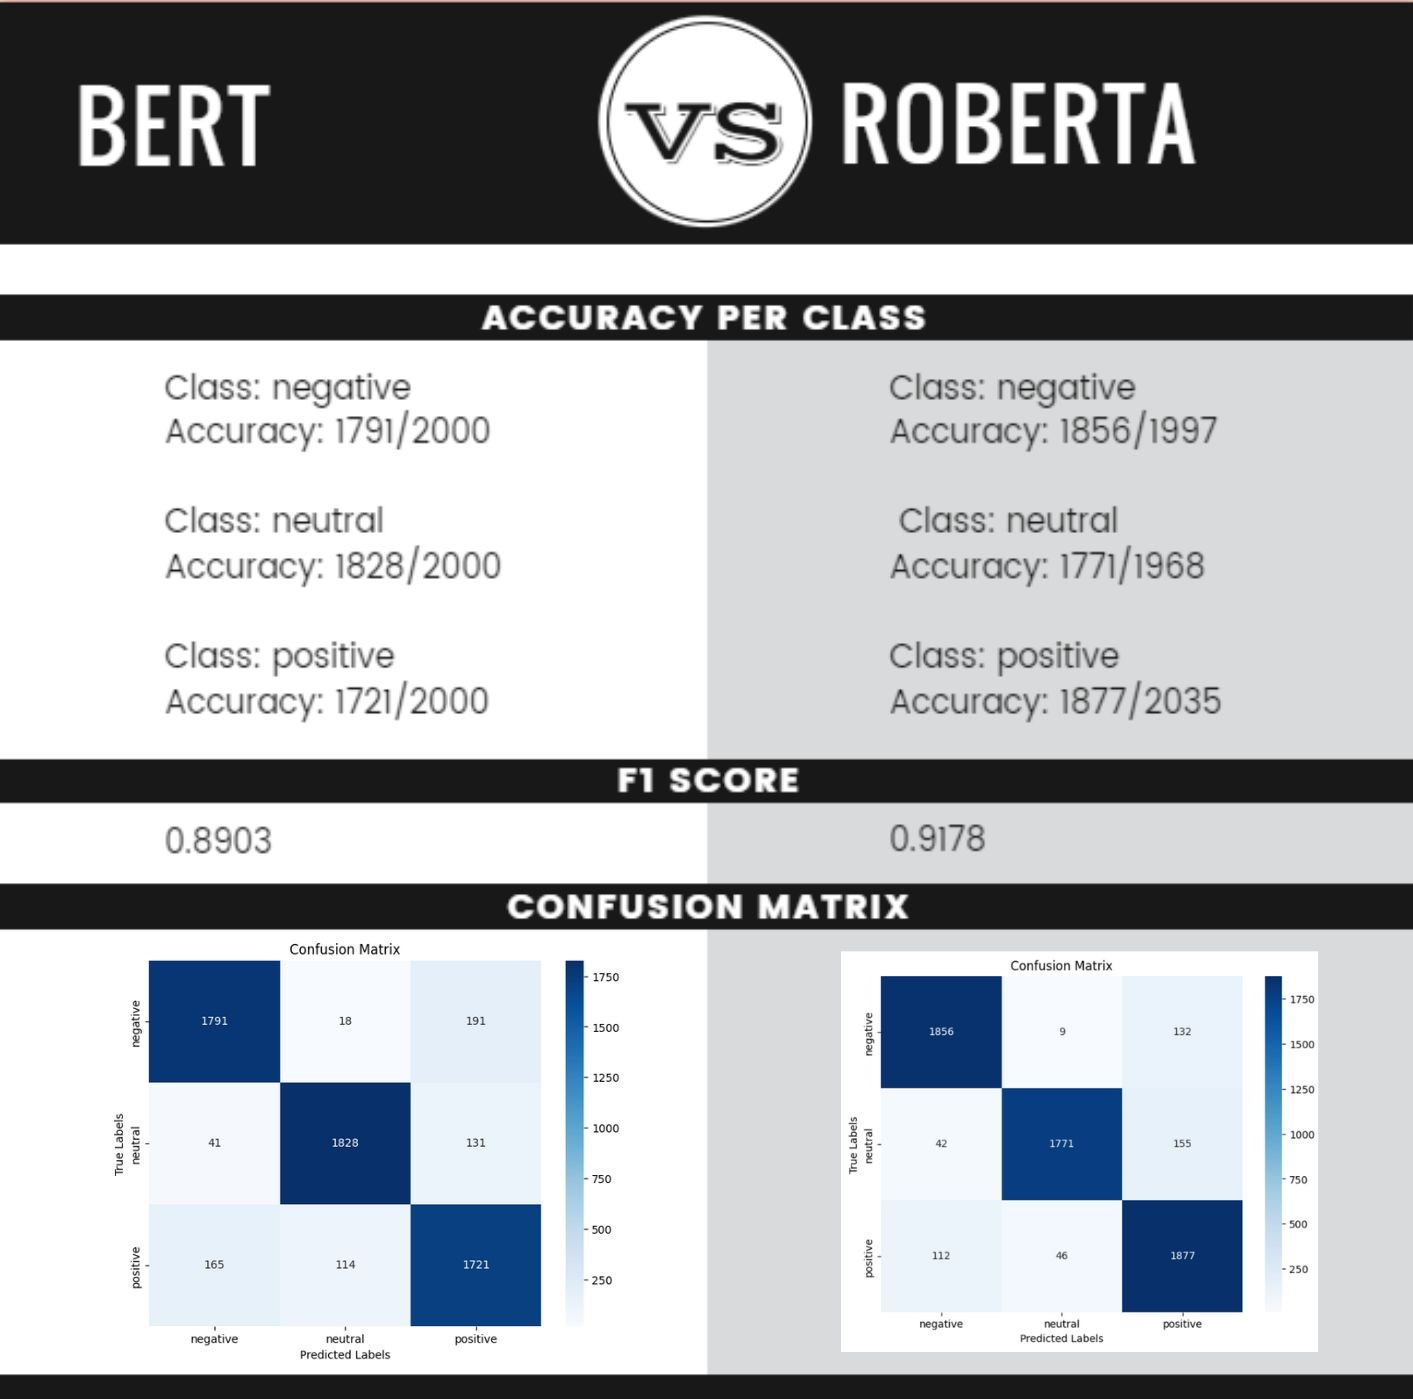

#**Analyzing Tweets From 1 Patient Over Time**

##Analyzing with labels: anger,  fear,  joy,  neutral,  sadness,  surprise

Finding the user with most tweets

In [ ]:
most_tweets_user = df1['User'].value_counts().idxmax()

print(f"The user with the most tweets is: {most_tweets_user}")

The user with the most tweets is: MindOverColor


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

Finding the number of her/his tweets.

In [ ]:
num_tweets = df1[df1['User'] == most_tweets_user].shape[0]

print(f"The user {most_tweets_user} has posted {num_tweets} tweets.")

The user MindOverColor has posted 723 tweets.


Getting the data for that user.

In [ ]:
user_data = df1[df1['User'] == most_tweets_user]

In [ ]:
user_data['Date'] = pd.to_datetime(user_data['Date'])

<ipython-input-64-bb487aff2a8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Date'] = pd.to_datetime(user_data['Date'])


Finding how many tweets she/he has for each label.

In [ ]:
label_counts = user_data['label'].value_counts()
print(f"Label Counts for User: {most_tweets_user}")
print(label_counts)

Label Counts for User: MindOverColor
fear        424
sadness     184
joy          49
anger        43
surprise     17
neutral       6
Name: label, dtype: int64


In [ ]:
#Creating columns for Year and Month
user_data['Year'] = user_data['Date'].dt.year
user_data['Month'] = user_data['Date'].dt.month

<ipython-input-66-682263beeb78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Year'] = user_data['Date'].dt.year
<ipython-input-66-682263beeb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Month'] = user_data['Date'].dt.month


In [ ]:
label_counts_by_year_month = user_data.groupby(['Year', 'Month', 'label']).size().unstack(fill_value=0)

print(f"Label Counts for User: {most_tweets_user}")
print(label_counts_by_year_month)

Label Counts for User: MindOverColor
label       anger  fear  joy  neutral  sadness  surprise
Year Month                                              
2021 6          0     1    0        0        1         0
     7          1    15    0        0        5         1
     8          1    35    2        0        6         2
     9          1     9    0        0        4         2
     10         0     3    0        0        2         0
     11         0     1    0        0        0         0
     12         1     9    2        0        6         0
2022 1          2    27    6        1       11         0
     2          0    34    2        0        9         0
     3          0    13    2        0       11         0
     4          0     7    1        0        3         0
     5          1    27    3        1        6         1
     6          3    17    0        0       13         0
     7          1    13    3        0        6         0
     8          4    19    3        0       10     

In [ ]:
pip install tabulate

In [ ]:
from tabulate import tabulate

table = tabulate(label_counts_by_year_month, headers='keys', tablefmt='grid')

print(f"Label Counts for User: {most_tweets_user}")
print(table)


Label Counts for User: MindOverColor
+------------+---------+--------+-------+-----------+-----------+------------+
|            |   anger |   fear |   joy |   neutral |   sadness |   surprise |
+============+=========+========+=======+===========+===========+============+
| (2021, 6)  |       0 |      1 |     0 |         0 |         1 |          0 |
+------------+---------+--------+-------+-----------+-----------+------------+
| (2021, 7)  |       1 |     15 |     0 |         0 |         5 |          1 |
+------------+---------+--------+-------+-----------+-----------+------------+
| (2021, 8)  |       1 |     35 |     2 |         0 |         6 |          2 |
+------------+---------+--------+-------+-----------+-----------+------------+
| (2021, 9)  |       1 |      9 |     0 |         0 |         4 |          2 |
+------------+---------+--------+-------+-----------+-----------+------------+
| (2021, 10) |       0 |      3 |     0 |         0 |         2 |          0 |
+------------+-

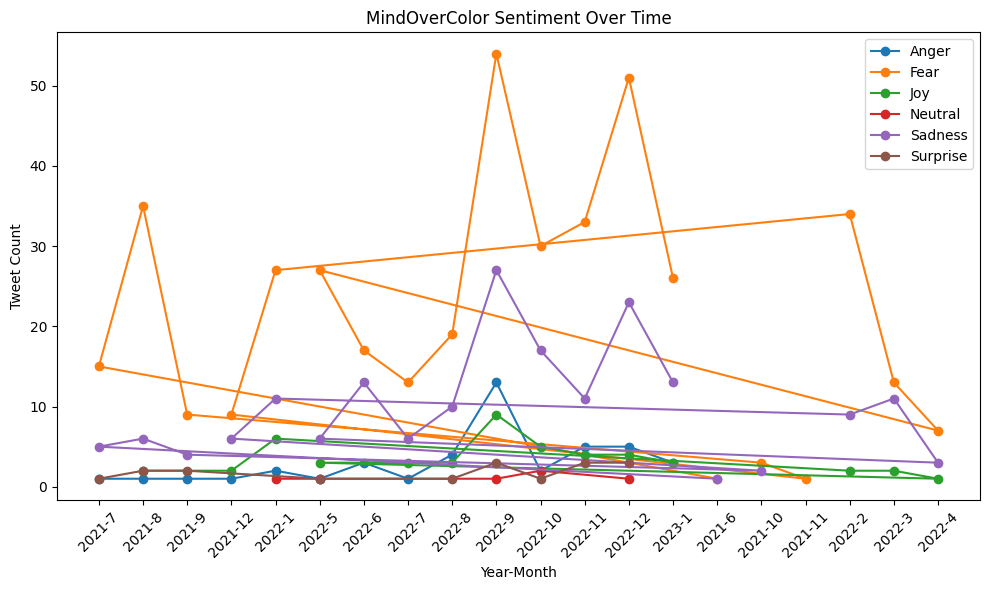

In [ ]:
sentiment_order = ['anger', 'fear', 'joy', 'neutral', 'sadness', 'surprise']

plt.figure(figsize=(10, 6))
for sentiment in sentiment_order:
    sentiment_data = user_data[user_data['label'] == sentiment]
    label_counts_by_year_month = sentiment_data.groupby(['Year', 'Month']).size().reset_index(name='Count')
    label_counts_by_year_month['YearMonth'] = label_counts_by_year_month.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
    plt.plot(label_counts_by_year_month['YearMonth'], label_counts_by_year_month['Count'], marker='o', label=sentiment.capitalize())

plt.title(f'{most_tweets_user} Sentiment Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

##Changing sentiments of dataset

In [ ]:
df1 = df1[df1['label'] != 'surprise']

emotion_to_sentiment = {
    'fear': 'negative',
    'anger': 'negative',
    'joy': 'positive',
    'sadness': 'negative',
    'neutral': 'neutral',
    'disgust': 'negative'
}
df1['label'] = df1['label'].replace(emotion_to_sentiment)

<ipython-input-71-bcc18818d0fa>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label'] = df1['label'].replace(emotion_to_sentiment)


In [ ]:
unique_labels = df1['label'].unique()
num_unique_labels = len(unique_labels)

print(f"Number of unique labels: {num_unique_labels}")
print("Unique labels:", unique_labels)

label_counts = df1['label'].value_counts()

print("Label Counts:")
for label, count in label_counts.items():
    print(f"{label}: {count}")

Number of unique labels: 3
Unique labels: ['negative' 'positive' 'neutral']
Label Counts:
negative: 157801
positive: 14700
neutral: 10509


##Analyzing with labels: positive, negative

In [ ]:
most_tweets_user = df1['User'].value_counts().idxmax()
df1['Date'] = pd.to_datetime(df1['Date'])
num_tweets = df1[df1['User'] == most_tweets_user].shape[0]
user_data = df1[df1['User'] == most_tweets_user]
user_data['Date'] = pd.to_datetime(user_data['Date'])

<ipython-input-73-9d546c8059de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Date'] = pd.to_datetime(user_data['Date'])


Finding how many tweets she/he has for each label.

In [ ]:
label_counts = user_data['label'].value_counts()
print(f"Label Counts for User: {most_tweets_user}")
print(label_counts)

Label Counts for User: MindOverColor
negative    651
positive     49
neutral       6
Name: label, dtype: int64


In [ ]:
#Creating columns for Year and Month
user_data['Year'] = user_data['Date'].dt.year
user_data['Month'] = user_data['Date'].dt.month

<ipython-input-75-682263beeb78>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Year'] = user_data['Date'].dt.year
<ipython-input-75-682263beeb78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Month'] = user_data['Date'].dt.month


In [ ]:
user_data.head()

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label,Year,Month
82,2022-12-31 18:37:56+00:00,MindOverColor,@tiredguineapig I couldn’t.😬\nHave you tried p...,0.0,0.0,1.0,55.0,NaN,NaN,1,0,negative,2022,12
95,2022-12-31 17:23:46+00:00,MindOverColor,@MikeWil15339637 @Dakota_150 It blows my mind ...,17.0,1.0,2.0,421.0,NaN,NaN,1,0,negative,2022,12
325,2022-12-30 20:03:56+00:00,MindOverColor,@useless_priest It’s like doing a Long Covid 1...,13.0,0.0,1.0,182.0,NaN,NaN,1,0,positive,2022,12
329,2022-12-30 19:52:11+00:00,MindOverColor,@calirunnerdoc My family were very good about ...,2.0,0.0,1.0,82.0,NaN,NaN,1,0,negative,2022,12
341,2022-12-30 19:03:12+00:00,MindOverColor,@HHSGov “protect against COVID’S worst outcome...,2.0,0.0,0.0,163.0,NaN,"['LongCovid', 'COVID19', 'COVID', 'BringBackMa...",1,0,negative,2022,12


In [ ]:
from tabulate import tabulate

label_counts_by_year_month = user_data.groupby(['Year', 'Month', 'label']).size().unstack(fill_value=0)

table = tabulate(label_counts_by_year_month, headers='keys', tablefmt='grid')

print(f"Label Counts for User: {most_tweets_user}")
print(table)

Label Counts for User: MindOverColor
+------------+------------+-----------+------------+
|            |   negative |   neutral |   positive |
+============+============+===========+============+
| (2021, 6)  |          2 |         0 |          0 |
+------------+------------+-----------+------------+
| (2021, 7)  |         21 |         0 |          0 |
+------------+------------+-----------+------------+
| (2021, 8)  |         42 |         0 |          2 |
+------------+------------+-----------+------------+
| (2021, 9)  |         14 |         0 |          0 |
+------------+------------+-----------+------------+
| (2021, 10) |          5 |         0 |          0 |
+------------+------------+-----------+------------+
| (2021, 11) |          1 |         0 |          0 |
+------------+------------+-----------+------------+
| (2021, 12) |         16 |         0 |          2 |
+------------+------------+-----------+------------+
| (2022, 1)  |         40 |         1 |          6 |
+--------

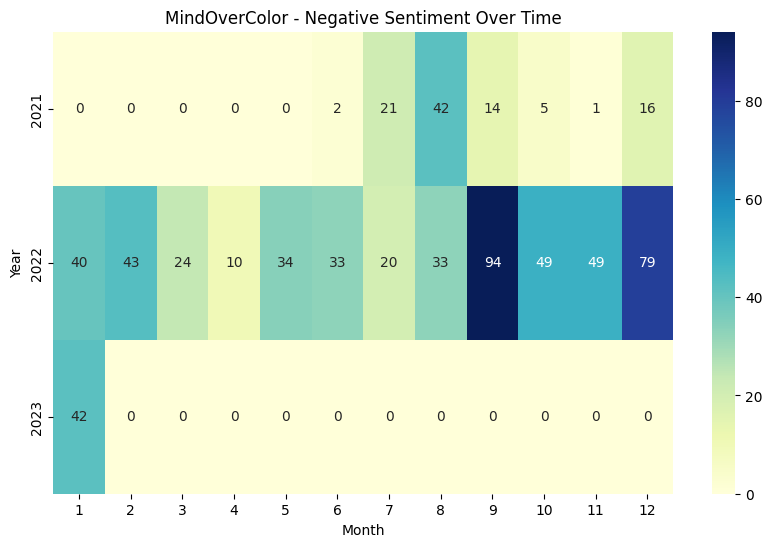

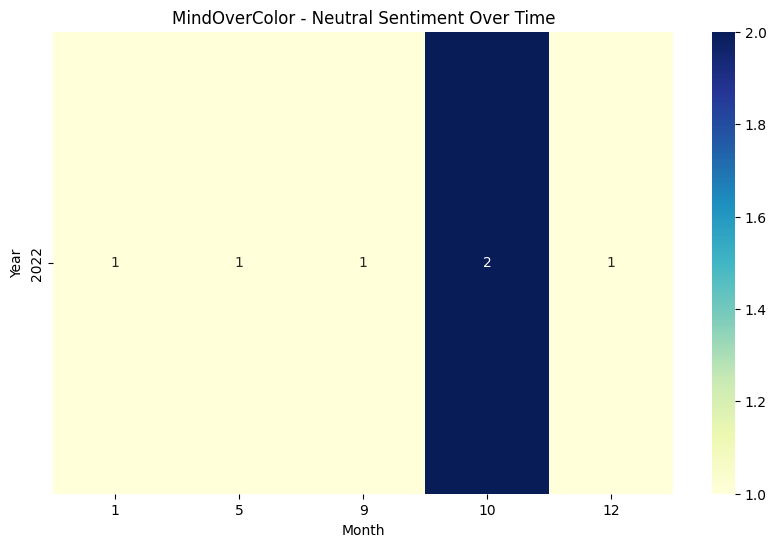

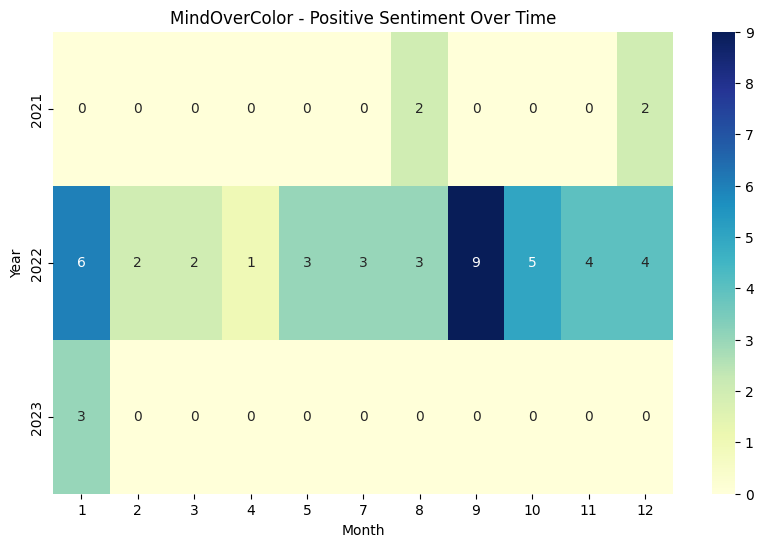

In [ ]:
sentiment_order = ['negative', 'neutral', 'positive']

for sentiment in sentiment_order:
    sentiment_data = user_data[user_data['label'] == sentiment]
    label_counts_by_year_month = sentiment_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

    # Plot the data using seaborn's heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(label_counts_by_year_month, cmap="YlGnBu", annot=True, fmt='d')
    plt.title(f'{most_tweets_user} - {sentiment.capitalize()} Sentiment Over Time')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

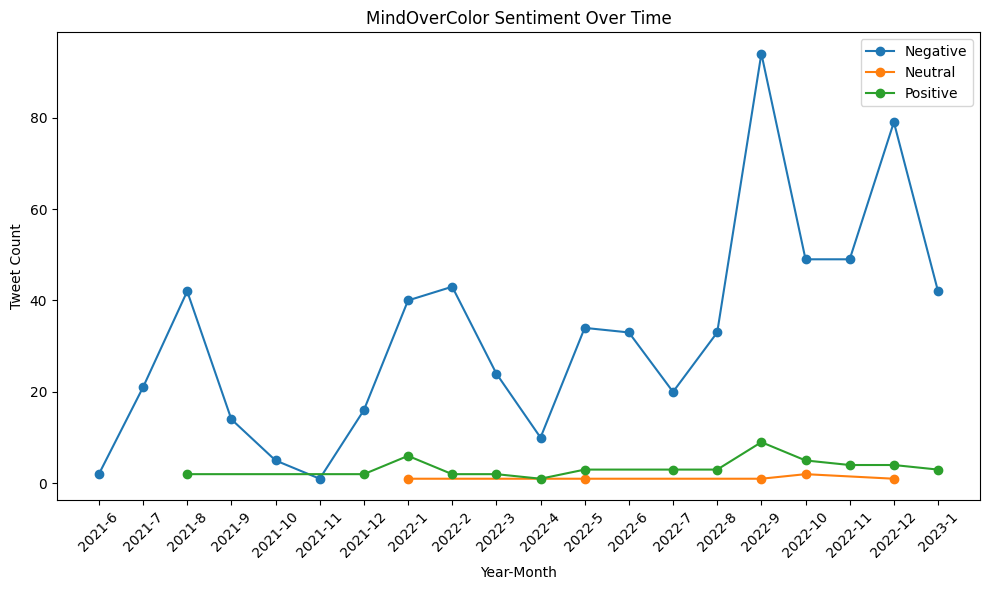

In [ ]:
plt.figure(figsize=(10, 6))
for sentiment in sentiment_order:
    sentiment_data = user_data[user_data['label'] == sentiment]
    label_counts_by_year_month = sentiment_data.groupby(['Year', 'Month']).size().reset_index(name='Count')
    label_counts_by_year_month['YearMonth'] = label_counts_by_year_month.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
    plt.plot(label_counts_by_year_month['YearMonth'], label_counts_by_year_month['Count'], marker='o', label=sentiment.capitalize())

plt.title(f'{most_tweets_user} Sentiment Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

#**Analyzing Tweets From All Patients Over Time**

In [ ]:
#Creating columns for Year and Month
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month

In [ ]:
label_counts_by_year_month = df1.groupby(['Year', 'Month', 'label']).size().unstack(fill_value=0)

table = tabulate(label_counts_by_year_month, headers='keys', tablefmt='grid')

print(f"Label Counts for all users")
print(table)

Label Counts for all users
+------------+------------+-----------+------------+
|            |   negative |   neutral |   positive |
+============+============+===========+============+
| (2020, 5)  |         24 |         7 |          7 |
+------------+------------+-----------+------------+
| (2020, 6)  |        138 |        15 |         16 |
+------------+------------+-----------+------------+
| (2020, 7)  |        799 |        31 |         77 |
+------------+------------+-----------+------------+
| (2020, 8)  |       1165 |        62 |        116 |
+------------+------------+-----------+------------+
| (2020, 9)  |       2100 |        72 |        165 |
+------------+------------+-----------+------------+
| (2020, 10) |       2800 |       110 |        221 |
+------------+------------+-----------+------------+
| (2020, 11) |       2375 |       122 |        205 |
+------------+------------+-----------+------------+
| (2020, 12) |       2627 |       150 |        306 |
+------------+-----

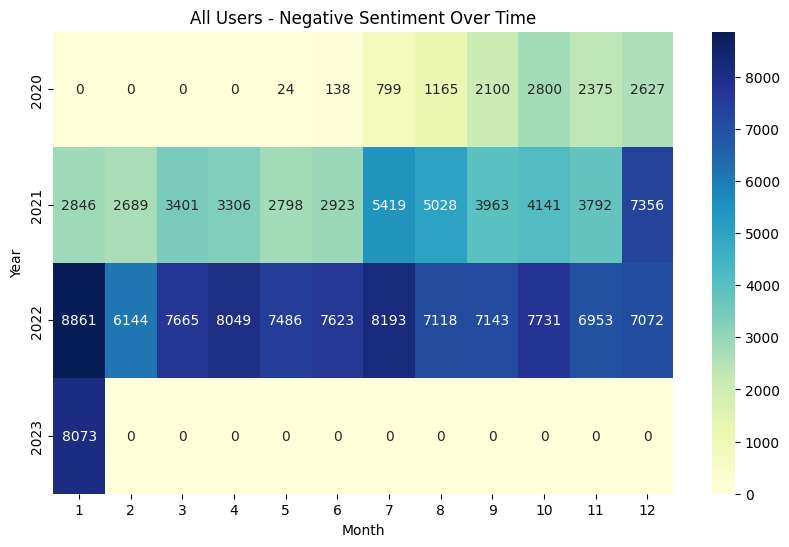

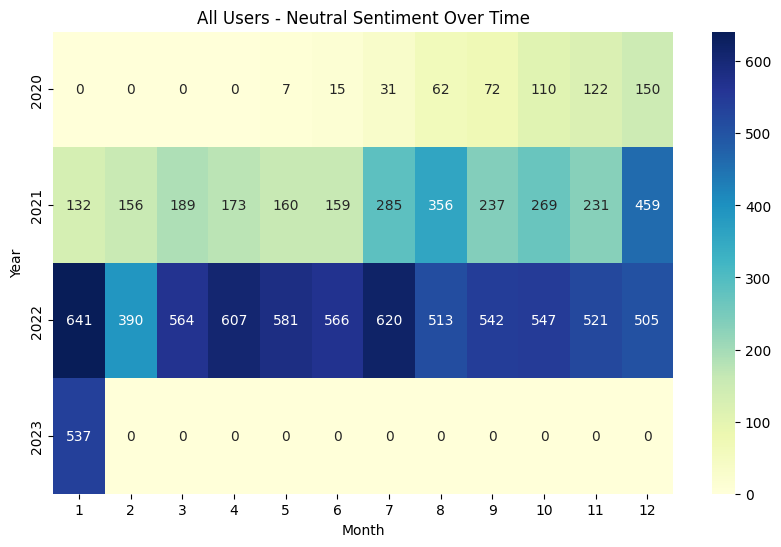

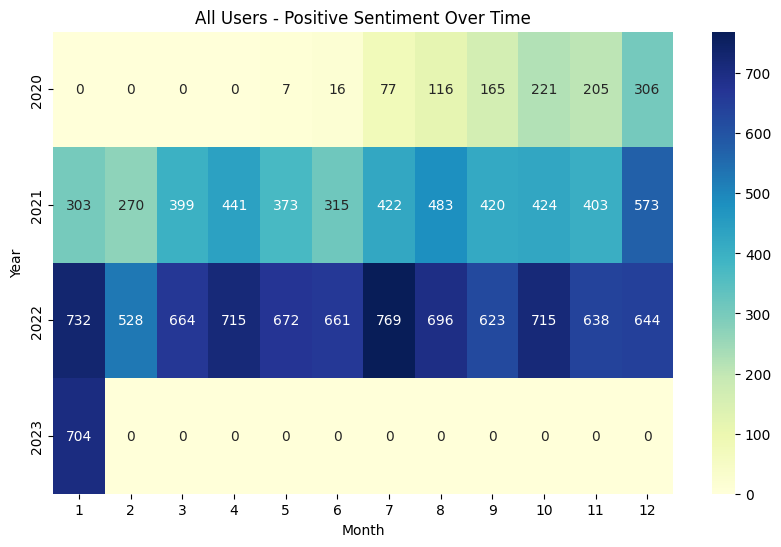

In [ ]:
sentiment_order = ['negative', 'neutral', 'positive']

for sentiment in sentiment_order:
    sentiment_data = df1[df1['label'] == sentiment]
    label_counts_by_year_month = sentiment_data.groupby(['Year', 'Month']).size().unstack(fill_value=0)

    # Plot the data using seaborn's heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(label_counts_by_year_month, cmap="YlGnBu", annot=True, fmt='d')
    plt.title(f'All Users - {sentiment.capitalize()} Sentiment Over Time')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.show()

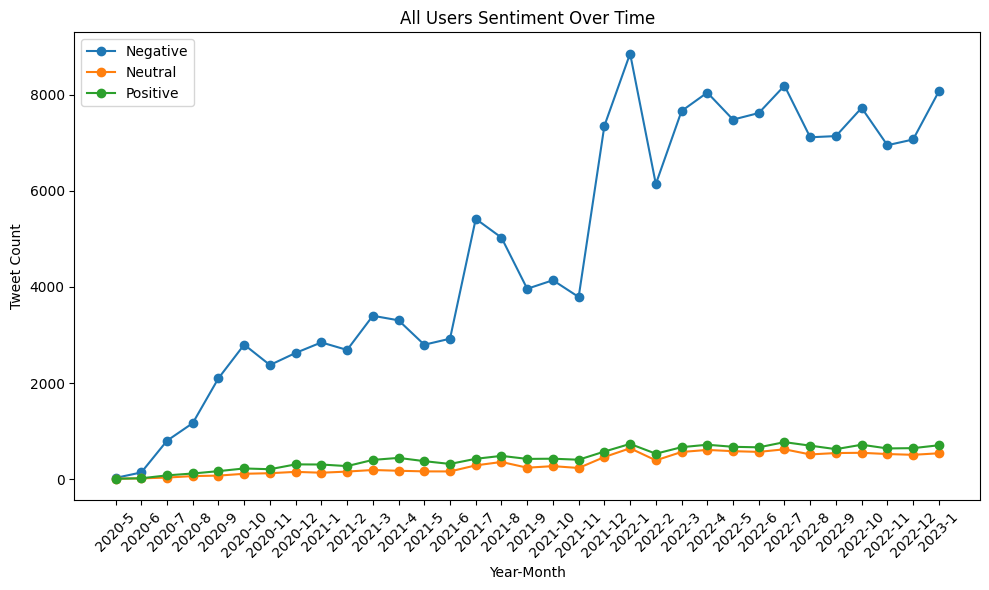

In [ ]:
plt.figure(figsize=(10, 6))
for sentiment in sentiment_order:
    sentiment_data = df1[df1['label'] == sentiment]
    label_counts_by_year_month = sentiment_data.groupby(['Year', 'Month']).size().reset_index(name='Count')
    label_counts_by_year_month['YearMonth'] = label_counts_by_year_month.apply(lambda row: f"{row['Year']}-{row['Month']}", axis=1)
    plt.plot(label_counts_by_year_month['YearMonth'], label_counts_by_year_month['Count'], marker='o', label=sentiment.capitalize())

plt.title(f'All Users Sentiment Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()